<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

**Autoencoders**

Autoencoders are neural networks used for unsupervised learning, specifically for dimensionality reduction and feature extraction. They work by encoding input data into a compressed (latent) representation and then reconstructing the original input from this representation. Autoencoders are useful for tasks like denoising, anomaly detection, and pretraining for other neural networks

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Compressesed Data:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


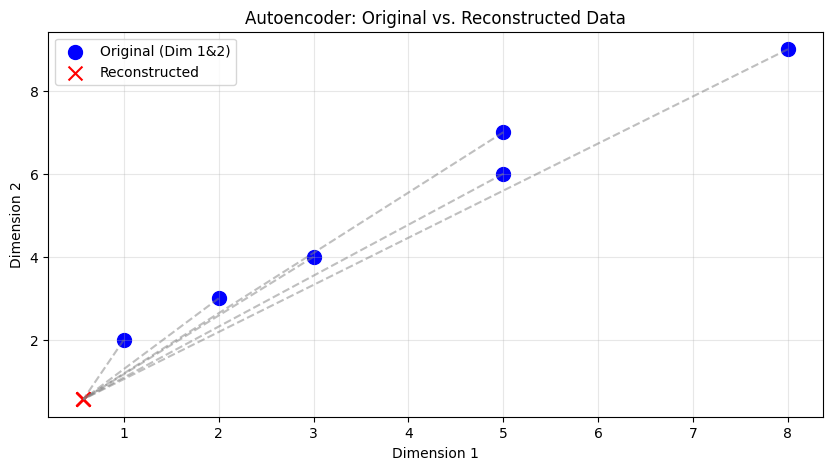

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Sample data from your screenshot (5-dimensional space)
X = np.array([[1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [3, 4, 5, 6, 7],
              [5, 6, 7, 8, 9], [5, 7, 8, 9, 10], [8, 9, 10, 11, 12]])

# Define the model architecture
input_dim = X.shape[1]
encoding_dim = 2  # Compressing to 2 dimensions

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer) # Encoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)    # Decoder

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train and predict
autoencoder.fit(X, X, epochs=100, batch_size=2, verbose=0)
encoder = Model(input_layer, encoded)
X_compressed = encoder.predict(X)

print("Compressesed Data:")
print(X_compressed)

# Get the reconstructed data from the autoencoder
reconstructed_X = autoencoder.predict(X)

# Visualization
plt.figure(figsize=(10, 5))

# We'll plot the first two dimensions to compare Original vs Reconstructed
plt.scatter(X[:, 0], X[:, 1], c='blue', s=100, label='Original (Dim 1&2)')
plt.scatter(reconstructed_X[:, 0], reconstructed_X[:, 1], c='red', marker='x', s=100, label='Reconstructed')

# Draw lines between original and reconstructed points to show "error"
for i in range(len(X)):
    plt.plot([X[i, 0], reconstructed_X[i, 0]], [X[i, 1], reconstructed_X[i, 1]], 'gray', linestyle='--', alpha=0.5)

plt.title('Autoencoder: Original vs. Reconstructed Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()